In [108]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [109]:
df = pd.read_csv("country_wise_latest.csv")

In [110]:
print(df.columns.tolist())


['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region']


In [ ]:
df = df.replace([np.inf, -np.inf], np.nan)

for c in df.columns:
    if df[c].dtype == "object":
        # intenta convertir a numérico si vienen números como texto; si no aplica, lo deja igual
        df[c] = pd.to_numeric(df[c], errors="ignore")


/var/folders/ph/43hbqcts0xq6dx91_rxmrh7m0000gn/T/ipykernel_27377/3807076433.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c], errors="ignore")


In [ ]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

print("Columnas numéricas usadas:", num_cols)


Columnas numéricas usadas: ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase']


In [ ]:
X_num = df[num_cols].copy()

X_num = X_num.replace([np.inf, -np.inf], np.nan)


In [ ]:
imp = SimpleImputer(strategy="median")
sca = StandardScaler()

X = imp.fit_transform(X_num)
X = sca.fit_transform(X)

print("Shape de X:", X.shape)


Shape de X: (187, 13)


K=1, Inercia = 2431.000000 - Diferencia = 0.000000
K=2, Inercia = 1166.995051 - Diferencia = 1264.004949
K=3, Inercia = 981.356823 - Diferencia = 185.638228
K=4, Inercia = 756.246355 - Diferencia = 225.110468
K=5, Inercia = 607.037773 - Diferencia = 149.208581
K=6, Inercia = 474.316712 - Diferencia = 132.721062
K=7, Inercia = 371.655953 - Diferencia = 102.660759
K=8, Inercia = 273.134456 - Diferencia = 98.521497
K=9, Inercia = 250.717805 - Diferencia = 22.416651
K=10, Inercia = 217.660889 - Diferencia = 33.056916


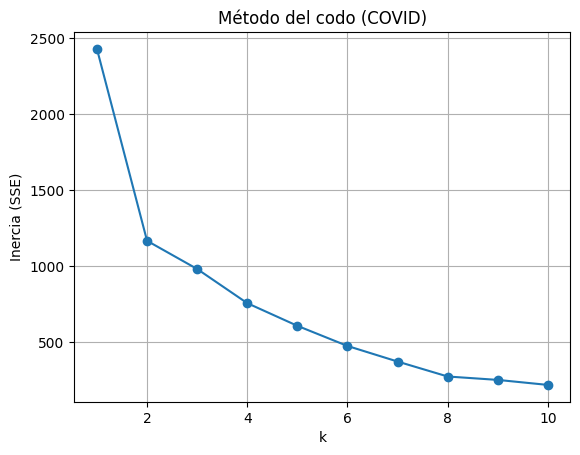

In [ ]:
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)
    diff = inertias[-2] - inertias[-1] if k > 1 else 0
    print(f'K={k}, Inercia = {km.inertia_:.6f} - Diferencia = {diff:.6f}')

plt.plot(range(1, 11), inertias, marker='o')
plt.title("Método del codo (COVID)")
plt.xlabel("k")
plt.ylabel("Inercia (SSE)")
plt.grid()
plt.show()


In [ ]:
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42)
labels = kmeans.fit_predict(X)
print("Conteo por cluster:", np.bincount(labels))


Conteo por cluster: [182   1   2   2]


In [ ]:
df_clusters = df.copy()
df_clusters["cluster"] = labels

cols_resumen = [c for c in num_cols][:8]  
resumen = df_clusters.groupby("cluster")[cols_resumen].mean().round(2)
resumen


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases
cluster,,,,,,,,
0,43476.14,1829.64,29356.32,12290.18,568.73,16.92,436.01,2.90
1,4290259.00,148011.00,1325804.00,2816444.00,56336.00,1076.00,27941.00,3.45
2,1961224.00,60513.00,1398903.50,501807.50,33870.50,625.50,33663.00,2.92
3,177560.50,26002.00,813.00,150745.50,553.50,4.00,1.50,13.36


In [118]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    diff = inertias[-2] - inertias[-1] if k > 1 else 0
    print(f'K={k}, Inercia = {kmeans.inertia_:,.6f} - Diferencia = {diff:,.6f}')

K=1, Inercia = 2,431.000000 - Diferencia = 0.000000
K=2, Inercia = 1,166.995051 - Diferencia = 1,264.004949
K=3, Inercia = 981.356823 - Diferencia = 185.638228
K=4, Inercia = 756.246355 - Diferencia = 225.110468
K=5, Inercia = 607.037773 - Diferencia = 149.208581
K=6, Inercia = 474.316712 - Diferencia = 132.721062
K=7, Inercia = 371.655953 - Diferencia = 102.660759
K=8, Inercia = 273.134456 - Diferencia = 98.521497
K=9, Inercia = 250.717805 - Diferencia = 22.416651
K=10, Inercia = 217.660889 - Diferencia = 33.056916


In [119]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df["Cluster"] = kmeans.labels_
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Cluster
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,0
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,0
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,0
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,0
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,0


In [120]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

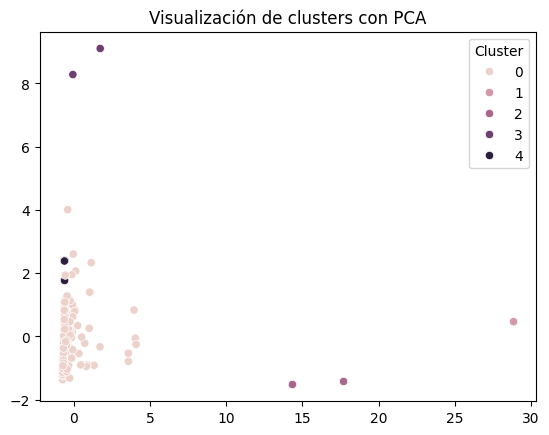

In [121]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"])
plt.title("Visualización de clusters con PCA")
plt.show()

In [122]:
df["Cluster"].value_counts()

Cluster
0    179
4      3
2      2
3      2
1      1
Name: count, dtype: int64

In [123]:
df[numerical_columns + ["Cluster"]].groupby("Cluster").mean()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Cluster,,,,,,,,,,,,,
0,4.420049e+04,1860.201117,2.984739e+04,1.249290e+04,577.765363,17.195531,443.27933,2.923464,66.413575,5.106149,4.053397e+04,3666.513966,10.883240
1,4.290259e+06,148011.000000,1.325804e+06,2.816444e+06,56336.000000,1076.000000,27941.00000,3.450000,30.900000,11.160000,3.834677e+06,455582.000000,11.880000
2,1.961224e+06,60513.000000,1.398904e+06,5.018075e+05,33870.500000,625.500000,33663.00000,2.925000,69.935000,4.125000,1.636992e+06,324232.000000,21.695000
3,1.775605e+05,26002.000000,8.130000e+02,1.507455e+05,553.500000,4.000000,1.50000,13.360000,0.415000,3224.760000,1.745380e+05,3022.500000,2.030000
4,2.566667e+02,6.333333,5.600000e+01,1.943333e+02,29.666667,0.666667,2.00000,1.776667,20.603333,8.070000,1.016667e+02,155.000000,178.976667


In [124]:
df[categorical_columns + ["Cluster"]].groupby("Cluster").agg(lambda x: x.mode()[0])

,Country/Region,WHO Region
Cluster,,
0,Afghanistan,Europe
1,US,Americas
2,Brazil,Americas
3,Netherlands,Europe
4,Bahamas,Africa


<Axes: xlabel='Confirmed', ylabel='Deaths'>

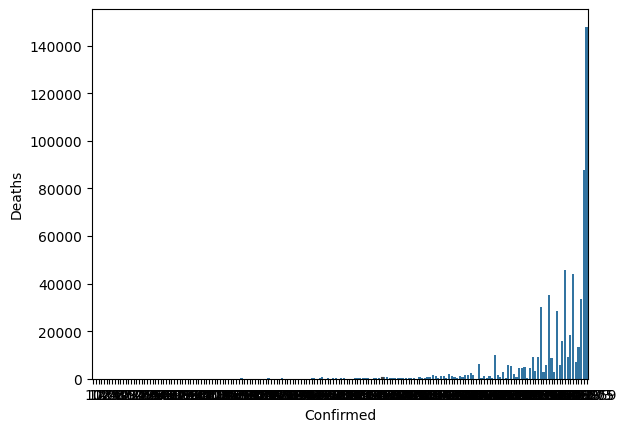

In [125]:
sns.barplot(df, x="Confirmed", y="Deaths", estimator="mean")

<Axes: xlabel='Confirmed', ylabel='Deaths'>

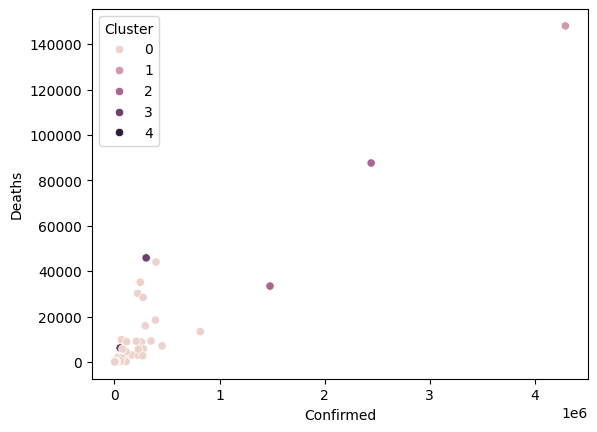

In [126]:
sns.scatterplot(df, x="Confirmed", y="Deaths", hue="Cluster")